In [ ]:
!unzip -qq /content/drive/MyDrive/open.zip

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
from glob import glob
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
# RLE 디코딩 함수
def rle_decode(mask_rle, shape):
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape)

# RLE 인코딩 함수
def rle_encode(mask):
    pixels = mask.flatten()
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    return ' '.join(str(x) for x in runs)

In [ ]:
df = pd.read_csv("train.csv")
df.head()

,img_id,img_path,mask_rle
0,TRAIN_0000,./train_img/TRAIN_0000.png,9576 7 10590 17 11614 17 12638 17 13662 17 146...
1,TRAIN_0001,./train_img/TRAIN_0001.png,208402 1 209425 6 210449 10 211473 14 212497 1...
2,TRAIN_0002,./train_img/TRAIN_0002.png,855 34 15654 9 16678 9 16742 8 17702 9 17766 9...
3,TRAIN_0003,./train_img/TRAIN_0003.png,362 6 745 15 798 22 900 25 1385 8 1828 16 1924...
4,TRAIN_0004,./train_img/TRAIN_0004.png,34 27 1058 27 2082 27 3105 27 4129 27 5153 27 ...


In [ ]:
img_path = df.iloc[0, 1]
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
h, w, _ = img.shape
mask_rle = df.iloc[0, 2]
label_img = rle_decode(mask_rle, (h, w))

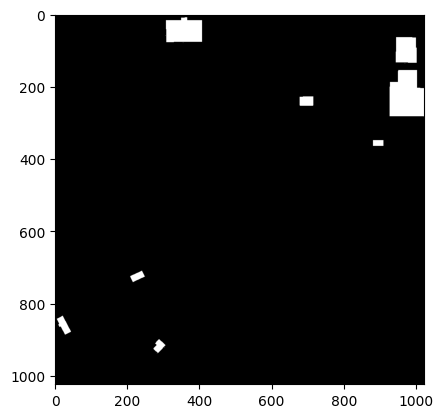

In [ ]:
plt.imshow(label_img, cmap="gray")
plt.show()

In [ ]:
def get_ratio(mask_rle, shape):
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    img_area = shape[0] * shape[1]
    return sum(lengths) / img_area * 100, (img_area - sum(lengths)) / img_area * 100

In [ ]:
building_ratio_lst = []
background_ratio_lst = []
for idx, row in df.iterrows():
  img_path = df.iloc[idx, 1]
  img = cv2.imread(img_path)
  h, w, _ = img.shape
  mask_rle = df.iloc[idx, 2]
  building_ratio, background_ratio = get_ratio(mask_rle, (h, w))
  building_ratio_lst.append(building_ratio)
  background_ratio_lst.append(background_ratio)
  # print(f"building_ratio: {building_ratio:.3f}%, background_ratio: {background_ratio:.3f}%")

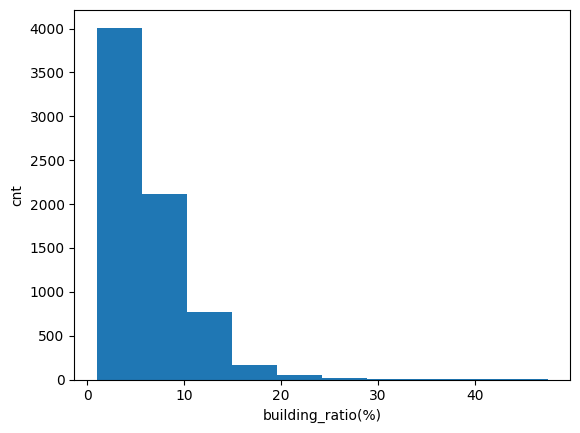

In [ ]:
plt.hist(building_ratio_lst)
plt.xlabel('building_ratio(%)')
plt.ylabel('cnt')
plt.show()

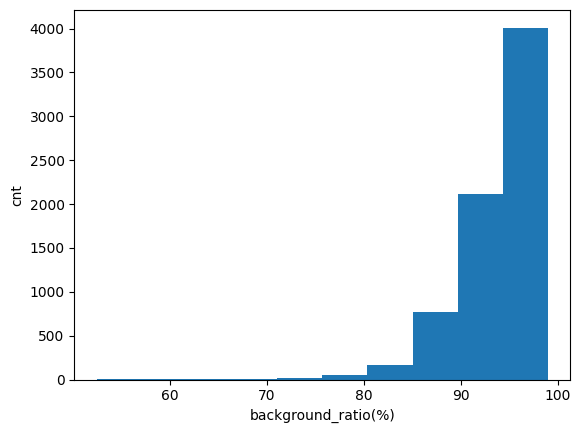

In [ ]:
plt.hist(background_ratio_lst)
plt.xlabel('background_ratio(%)')
plt.ylabel('cnt')
plt.show()